In [1]:
root = "C:/Users/egorg/Projects/MemcoinsTradingBotPolygon"; import sys; sys.path.append(root)

In [2]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler

import src.utils as util
from src.env.data import Dataset, ScalarFeatures

In [3]:
# pd.options.display.float_format = '{:,.8f}'.format

In [4]:
data_path = f"{root}/data"
shift = int(180 / 60)
datasets: list[Dataset] = util.load_datasets(data_path, shift)
len(datasets)

5049

In [5]:
df = util.dataset_to_dataframe(datasets)
df

,dataset,std,rstd,ma_distance_ratio,rsi_crossovers,rsi_crossunders,entropy,regression_slope,regression_sqr,volatility_clustering,...,drawdown_convexity,drop_velocity,regime,trial_rank,profit,detection_period,drop_threshold,reversal_threshold,tp_pct,sl_pct
0,0_10,6.523627e-08,0.136456,0.048904,1,0,3.023363,0.002367,0.784891,0.045169,...,0.000027,0.711631,23,0,1005.423851,5,0.0460,0.03290,0.0491,0.00751
1,0_10,6.523627e-08,0.136456,0.048904,1,0,3.023363,0.002367,0.784891,0.045169,...,0.000027,0.711631,23,1,1000.000000,2,0.1317,0.04711,0.0832,0.01802
2,0_10,6.523627e-08,0.136456,0.048904,1,0,3.023363,0.002367,0.784891,0.045169,...,0.000027,0.711631,23,2,1000.000000,1,0.1401,0.06593,0.0625,0.02925
3,0_10,6.523627e-08,0.136456,0.048904,1,0,3.023363,0.002367,0.784891,0.045169,...,0.000027,0.711631,23,3,1000.000000,6,0.1169,0.07997,0.0707,0.05677
4,0_10,6.523627e-08,0.136456,0.048904,1,0,3.023363,0.002367,0.784891,0.045169,...,0.000027,0.711631,23,4,1000.000000,6,0.0709,0.06317,0.0576,0.03366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100975,9_8,7.732233e-08,0.028398,0.016616,0,0,2.079933,0.000122,0.589740,-0.039562,...,0.000009,0.257807,16,15,1242.107624,3,0.0488,0.01514,0.0980,0.07460
100976,9_8,7.732233e-08,0.028398,0.016616,0,0,2.079933,0.000122,0.589740,-0.039562,...,0.000009,0.257807,16,16,1242.107624,3,0.0497,0.01541,0.0999,0.07489
100977,9_8,7.732233e-08,0.028398,0.016616,0,0,2.079933,0.000122,0.589740,-0.039562,...,0.000009,0.257807,16,17,1242.107624,3,0.0494,0.01542,0.0985,0.07535
100978,9_8,7.732233e-08,0.028398,0.016616,0,0,2.079933,0.000122,0.589740,-0.039562,...,0.000009,0.257807,16,18,1242.107624,3,0.0492,0.01536,0.0999,0.07539


In [ ]:
corr = df.corr(method="pearson")
corr = corr.drop(columns=["dataset", "trial_rank", "regime"], index=["dataset", "trial_rank", "regime"], errors="ignore")
corr

,std,rstd,ma_distance_ratio,rsi_crossovers,rsi_crossunders,entropy,regression_slope,regression_sqr,volatility_clustering,max_drawdown_ratio,...,sign_change_ratio,drawdown_convexity,drop_velocity,regime,profit,detection_period,drop_threshold,reversal_threshold,tp_pct,sl_pct
std,1.000000,0.121839,0.110019,-0.034120,0.011595,0.038752,0.039793,-0.144305,0.132560,0.113208,...,-0.337518,-0.006371,0.052033,0.050404,0.001770,0.010161,0.008710,-0.002064,-0.022033,-0.017784
rstd,0.121839,1.000000,0.859207,0.067642,0.360565,-0.010825,0.333182,0.201874,0.102960,0.641641,...,-0.114195,-0.091222,0.213222,0.112765,0.444093,0.032907,-0.004453,-0.021842,-0.006224,-0.014869
ma_distance_ratio,0.110019,0.859207,1.000000,0.007018,0.266175,0.024633,0.270131,-0.050652,0.049588,0.727622,...,-0.168830,-0.152882,0.239315,0.177509,0.509953,0.016752,-0.013253,-0.028745,-0.002724,-0.004811
rsi_crossovers,-0.034120,0.067642,0.007018,1.000000,-0.102211,-0.273958,-0.340800,0.016550,0.049075,0.281231,...,-0.053936,-0.029108,-0.044433,0.023642,0.025778,-0.024411,0.005546,0.002920,-0.004366,-0.005308
rsi_crossunders,0.011595,0.360565,0.266175,-0.102211,1.000000,-0.166737,0.474775,0.015500,0.019983,-0.031642,...,-0.055429,0.049971,0.131435,0.036409,0.091257,0.001213,-0.019356,-0.015290,-0.016683,-0.037601
entropy,0.038752,-0.010825,0.024633,-0.273958,-0.166737,1.000000,0.020761,0.126248,-0.089381,-0.035496,...,0.013026,-0.003824,-0.025260,-0.005031,0.024971,0.015349,0.008656,0.010035,0.009949,0.026505
regression_slope,0.039793,0.333182,0.270131,-0.340800,0.474775,0.020761,1.000000,0.015533,0.002345,-0.368933,...,-0.035760,0.123962,0.269886,0.005365,0.028590,0.025955,0.003323,-0.003012,-0.006248,-0.014932
regression_sqr,-0.144305,0.201874,-0.050652,0.016550,0.015500,0.126248,0.015533,1.000000,-0.020732,-0.031063,...,0.259476,0.083444,-0.044651,-0.067237,0.042575,0.019948,-0.000800,-0.004295,-0.008323,-0.007458
volatility_clustering,0.132560,0.102960,0.049588,0.049075,0.019983,-0.089381,0.002345,-0.020732,1.000000,0.119163,...,-0.030534,-0.021168,0.051989,0.060566,0.036181,-0.015372,0.003128,0.001789,0.002411,-0.009719
max_drawdown_ratio,0.113208,0.641641,0.727622,0.281231,-0.031642,-0.035496,-0.368933,-0.031063,0.119163,1.000000,...,-0.121559,-0.181948,0.056575,0.184929,0.446965,-0.001574,-0.023098,-0.038368,0.006225,0.003781


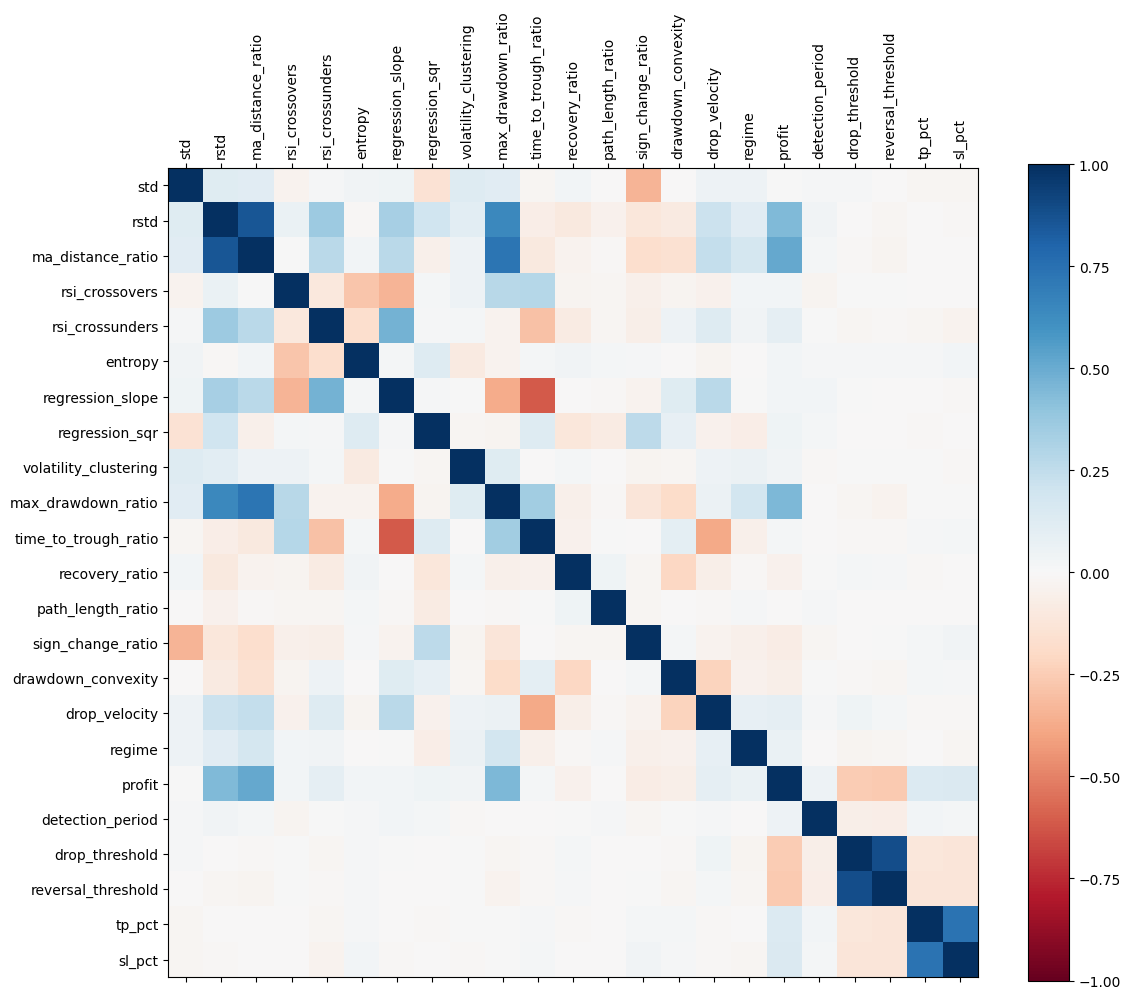

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))
norm = TwoSlopeNorm(vmin=-1, vcenter=-0.0, vmax=1)
cax = ax.matshow(corr.values, cmap="RdBu", norm=norm)
fig.colorbar(cax)
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)
plt.tight_layout()
plt.show()

In [ ]:
feature_names = ["std", "rstd", "ma_distance_ratio", "rsi_crossovers", "rsi_crossunders", "entropy", "regression_slope", "regression_sqr", "volatility_clustering", "max_drawdown_ratio", "time_to_trough_ratio", "recovery_ratio", "path_length_ratio", "sign_change_ratio", "drawdown_convexity", "drop_velocity"]
features_selected: list[str] = ["detection_period", "drop_threshold", "reversal_threshold", "tp_pct", "sl_pct"]

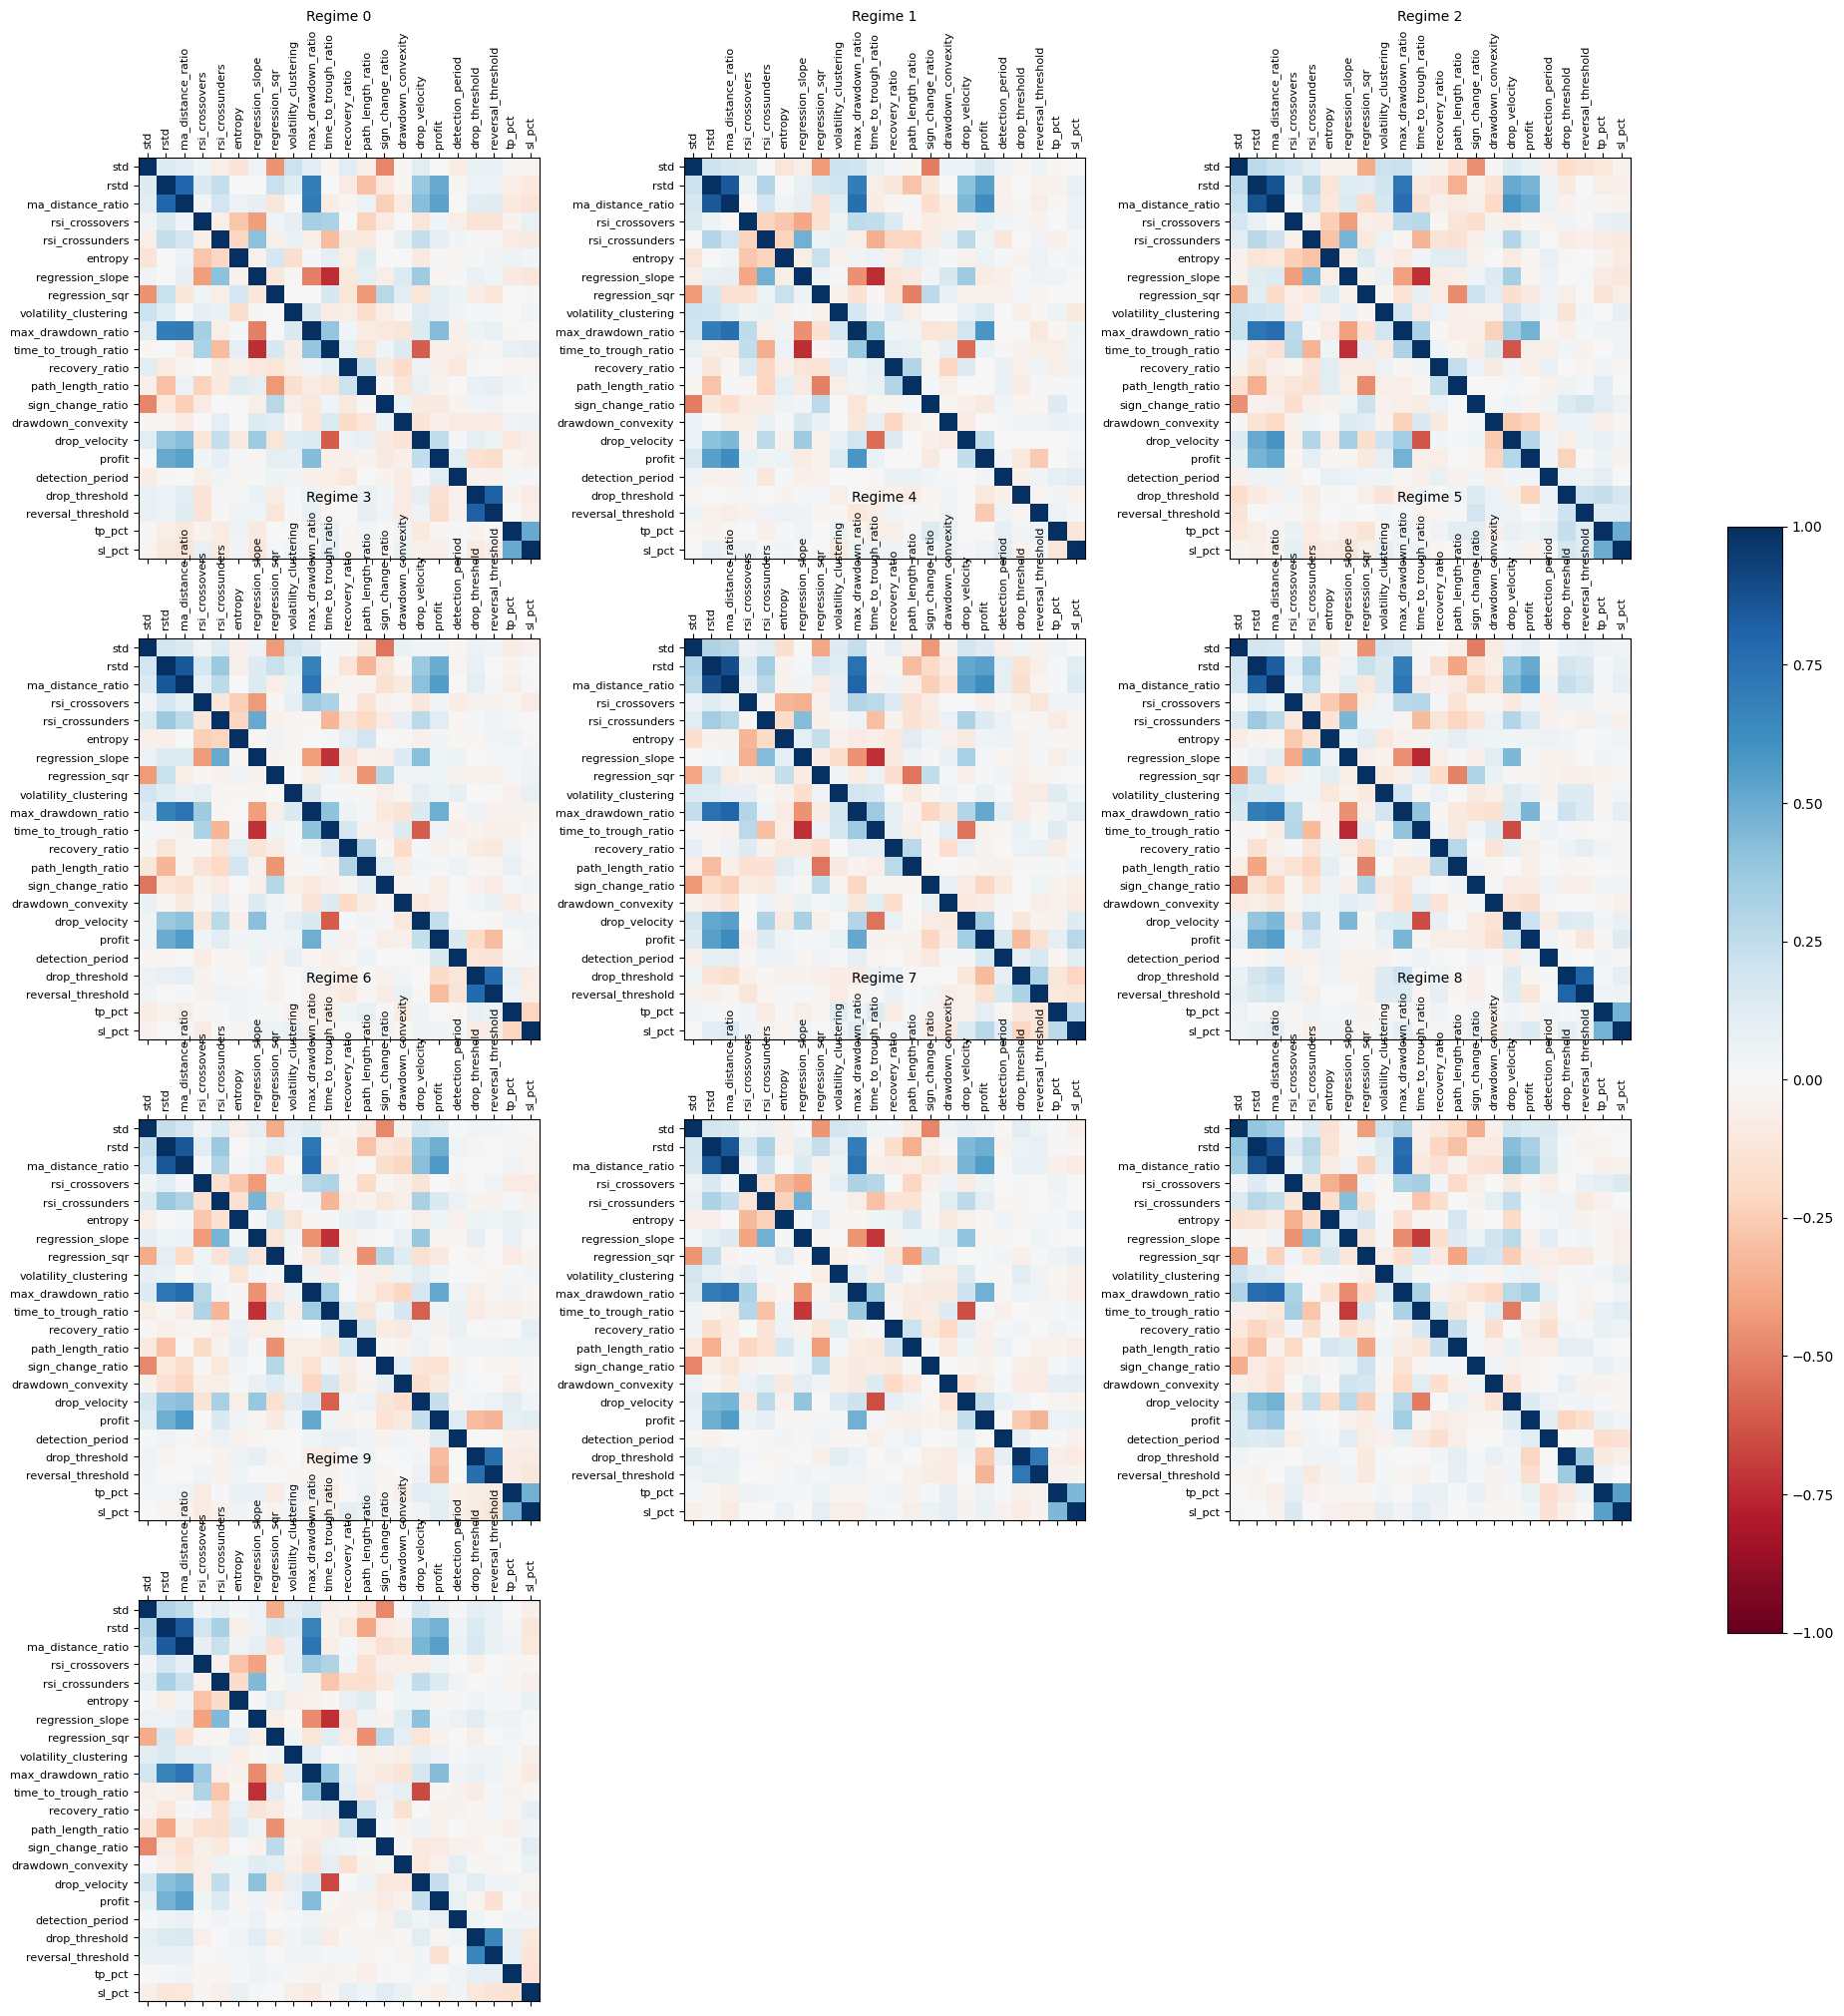

regime
9    751
7    592
3    585
5    581
6    565
1    459
0    420
8    385
2    357
4    354
Name: count, dtype: int64

In [ ]:
n_plots, n_cols = 10, 3
n_rows = math.ceil(n_plots / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, n_rows * (4 + 2)))
axes = axes.flatten() 
for i in range(n_plots):
    ax = axes[i]
    df_temp = df[df["regime"] == i]
    df_temp = df_temp[df_temp["trial_rank"] == 0] # [["profit", "detection_period", "drop_threshold", "reversal_threshold", "tp_pct", "sl_pct"]]
    corr = df_temp.corr(method="pearson")
    corr = corr.drop(columns=["dataset", "trial_rank", "regime"], index=["dataset", "trial_rank", "regime"], errors="ignore")
    norm = TwoSlopeNorm(vmin=-1, vcenter=0.0, vmax=1)
    cax = ax.matshow(corr.values, cmap="RdBu", norm=norm)
    ax.set_title(f"Regime {i}", fontsize=10)
    ax.set_xticks(np.arange(len(corr.columns)))
    ax.set_yticks(np.arange(len(corr.columns)))
    ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
    ax.set_yticklabels(corr.columns, fontsize=8)
for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])
fig.colorbar(cax, ax=axes.tolist(), shrink=0.6)
plt.show()
df[df["trial_rank"] == 0]["regime"].value_counts()

In [15]:
features: list[list[np.float64 | int]] = []
for dataset in datasets:
    if dataset.features is None: continue
    scalar: ScalarFeatures = dataset.features.scalar
    buf: list[np.float64 | int] = []
    for e in features_selected:
        try:
            buf.append(getattr(scalar, e))
        except AttributeError as _:
            buf.append(getattr(dataset.strategy_params[0], e))
    features.append(buf)
scaler = StandardScaler()
x = np.array(features, dtype=np.float64)
x_scaled = scaler.fit_transform(x)

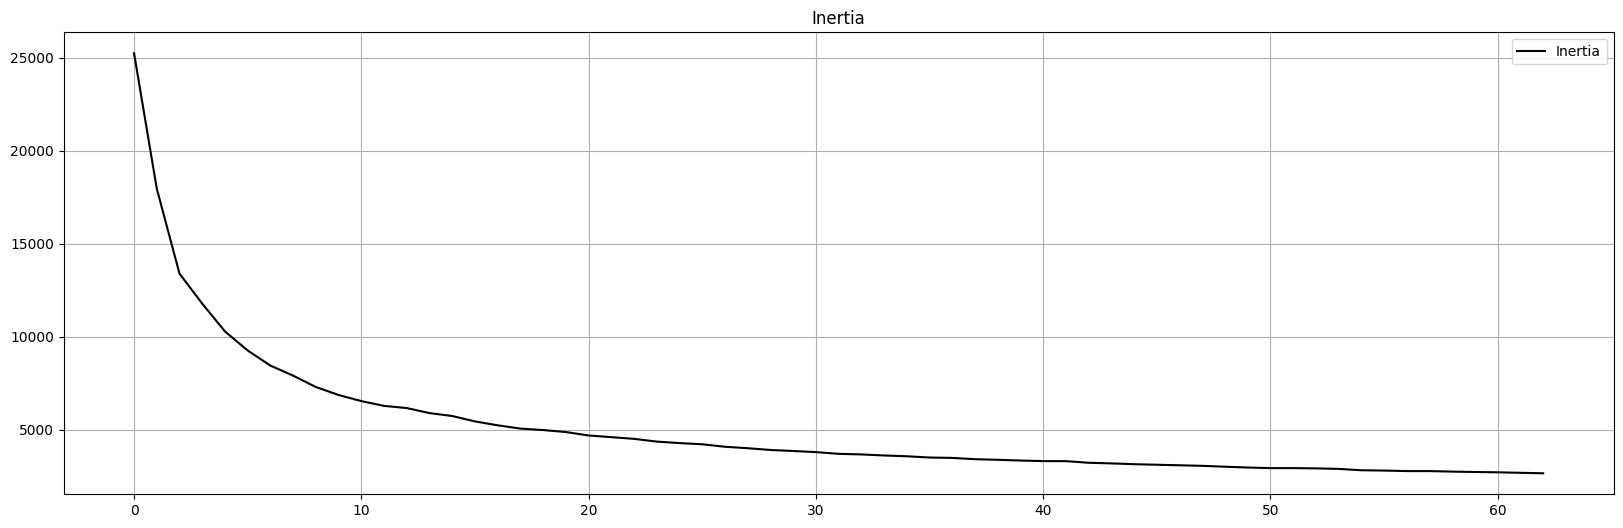

,k,score
0,2,0.297927
1,3,0.271550
2,4,0.232759
3,5,0.245960
4,6,0.230228
...,...,...
57,59,0.188221
58,60,0.190052
59,61,0.189784
60,62,0.190145


In [16]:
util.kmeans_inertia(x_scaled, 1, 64)
best_k, max_score, scores = util.kmeans_silhouette(x_scaled, 2, 64)
scores

In [25]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(x_scaled)
# df.insert(1, "regime", labels)
df["regime"] = labels

In [16]:
feature_significance = []
f_x = df[feature_names]
f_y = df['regime']
f, p = f_classif(f_x, f_y)
for feature, fval, pval in zip(f_x.columns, f, p):
    feature_significance.append({"feature": feature, "f": fval, "p": pval})
feature_significance = pd.DataFrame(feature_significance)
feature_significance

,feature,f,p
0,std,198.920891,0.0
1,rstd,391.084979,0.0
2,ma_distance_ratio,280.670655,0.0
3,rsi_crossovers,169.371970,0.0
4,rsi_crossunders,194.688590,0.0
5,entropy,78.000427,0.0
6,regression_slope,476.766746,0.0
7,regression_sqr,189.283978,0.0
8,volatility_clustering,76.430118,0.0
9,max_drawdown_ratio,289.419200,0.0


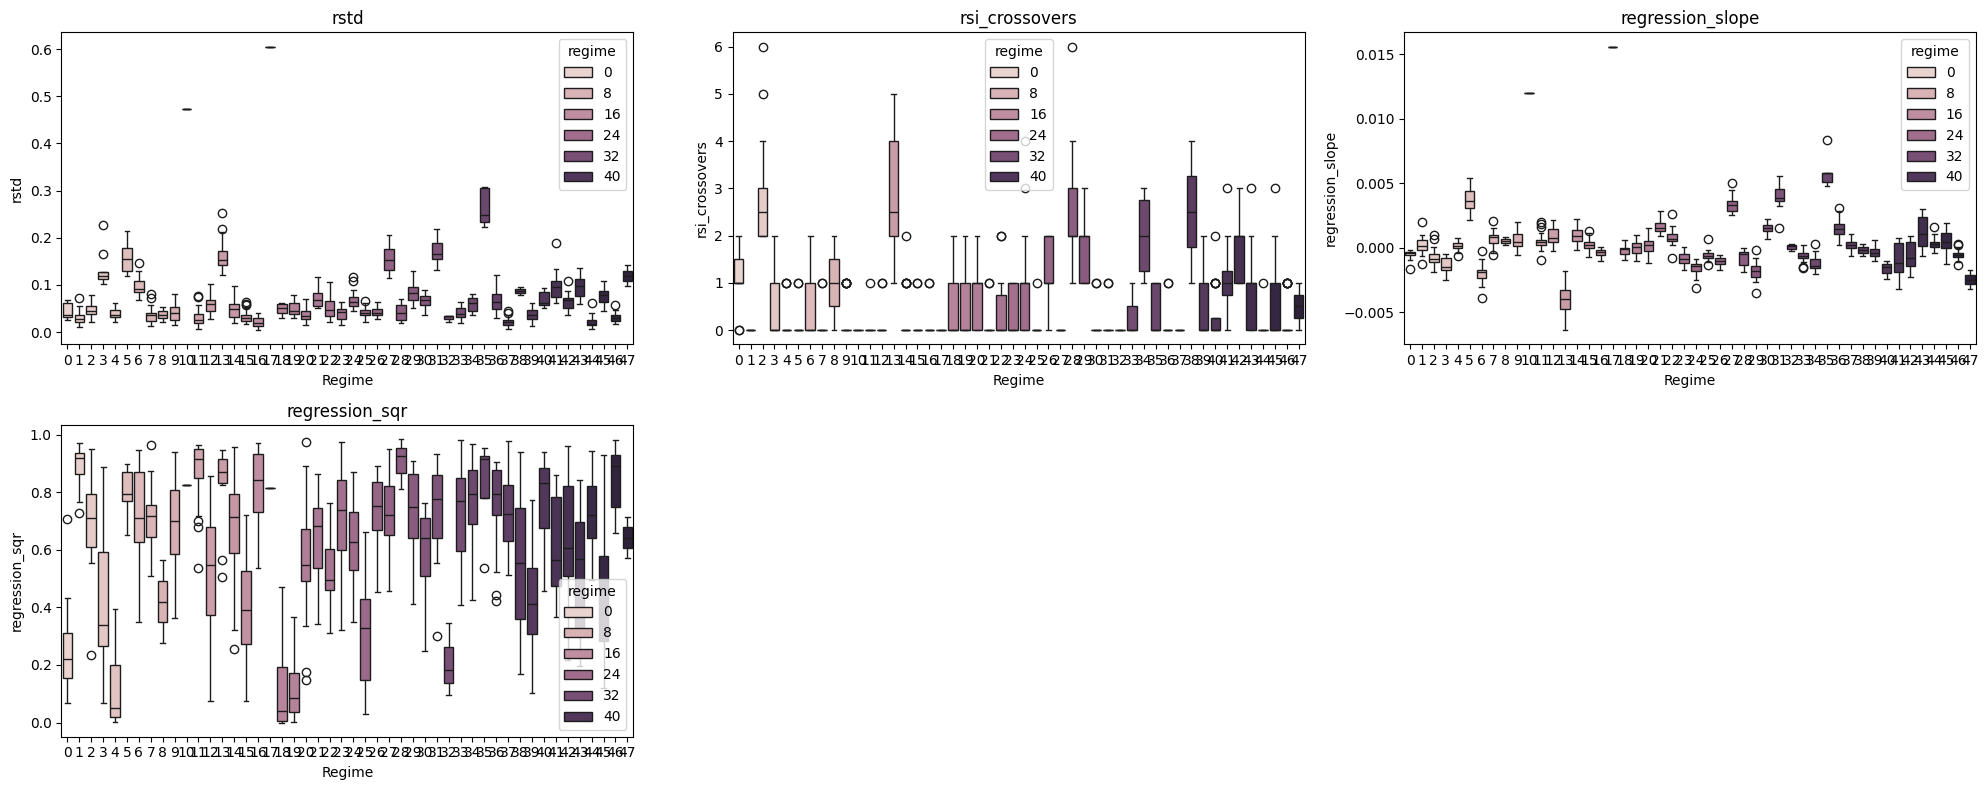

In [ ]:
n_features, n_cols = len(features_selected), 3
n_rows = math.ceil(n_features / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()
for i, col in enumerate(features_selected):
    sns.boxplot(x="regime", y=col, data=df, ax=axes[i], hue="regime")
    axes[i].set_title(col)
    axes[i].set_xlabel("Regime")
    axes[i].set_ylabel(col)
for j in range(i + 1, len(axes)): axes[j].axis('off')
plt.tight_layout()
plt.show()

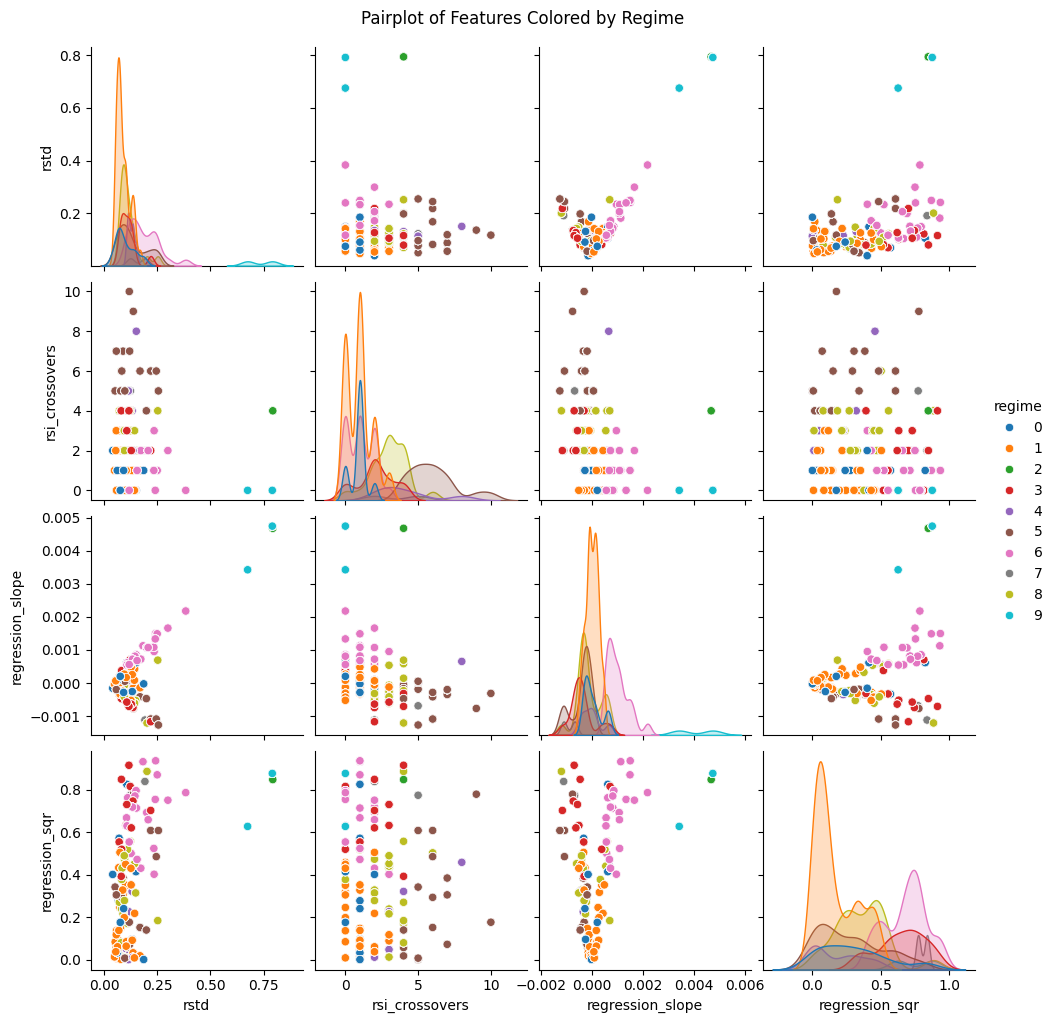

In [ ]:
sns.pairplot(df, vars=features_selected, hue="regime", palette="tab10", diag_kind="kde")
plt.suptitle("Pairplot of Features Colored by Regime", y=1.02)
plt.show()

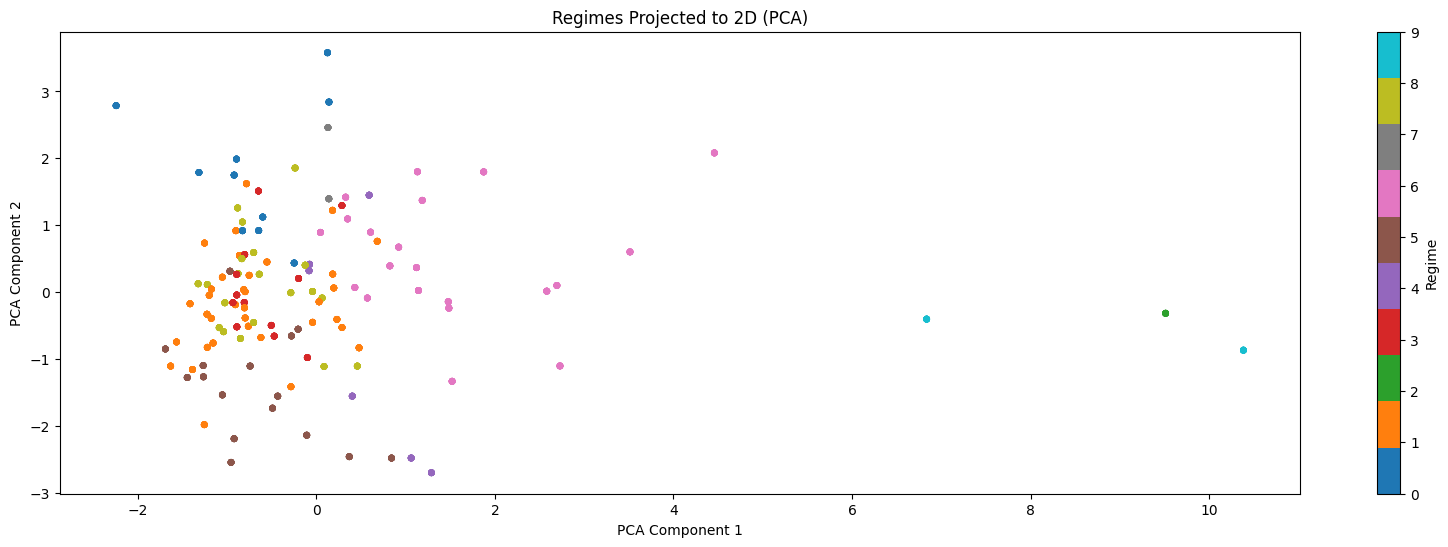

In [ ]:
pca = PCA(random_state=42, n_components=2)
x_2d = pca.fit_transform(x_scaled)
plt.figure(figsize=(20, 6))
scatter = plt.scatter(x_2d[:, 0], x_2d[:, 1], c=df["regime"], cmap="tab10", s=15)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Regimes Projected to 2D (PCA)")
plt.colorbar(scatter, label="Regime")
plt.show()

In [ ]:
df.groupby("regime")["profit"].describe()

,count,mean,std,min,25%,50%,75%,max
regime,,,,,,,,
0,100.00000000,"1,051.83262919",62.25973086,"1,000.00000000","1,000.00000000","1,035.08552831","1,069.13175317","1,221.87589973"
1,350.00000000,"1,078.18916636",107.17223240,961.80480368,"1,000.00000000","1,043.07569362","1,135.40251521","1,462.77398297"
2,10.00000000,"2,190.37575981",16.30453505,"2,171.37628129","2,175.23259658","2,186.80154246","2,204.10765633","2,216.97604518"
3,120.00000000,"1,035.10764706",69.86144818,"1,000.00000000","1,000.00000000","1,000.00000000","1,047.13641640","1,232.16325621"
4,60.00000000,"1,174.08561619",274.99462718,"1,000.00000000","1,000.00000000","1,083.45143194","1,110.83869771","1,924.44987723"
5,160.00000000,"1,229.71779524",187.70548224,993.35069243,"1,064.21355937","1,194.99659063","1,406.99761447","1,548.73507052"
6,210.00000000,"1,230.04783693",278.88128878,992.70997943,"1,000.00000000","1,113.68564567","1,330.13155165","1,969.23121062"
7,20.00000000,"1,003.28229700",10.33718101,"1,000.00000000","1,000.00000000","1,000.00000000","1,000.00000000","1,045.10976851"
8,200.00000000,"1,182.97844268",362.21458281,"1,000.00000000","1,000.00000000","1,073.38105551","1,173.55853999","2,677.90829247"


In [ ]:
regimes_parameters_grid = []
for i in range(k):
    regime_trials = df[df["regime"] == i]
    regime_trials = regime_trials.nlargest(int(len(regime_trials) * 0.3), 'profit')
    regimes_parameters_grid.append(
        {
            "regime": i,
            "detection_period": math.ceil(regime_trials["detection_period"].median()),
            "drop_threshold": np.float64(regime_trials["drop_threshold"].median()),
            "reversal_threshold": np.float64(regime_trials["reversal_threshold"].median()),
            "tp_pct": np.float64(regime_trials["tp_pct"].median()),
            "sl_pct": np.float64(regime_trials["sl_pct"].median())
        }
    )
regimes_parameters_grid = pd.DataFrame(regimes_parameters_grid)
regimes_parameters_grid

,regime,detection_period,drop_threshold,reversal_threshold,tp_pct,sl_pct
0,0,6,0.10770000,0.03697500,0.04690000,0.01054000
1,1,6,0.07770000,0.03392000,0.07240000,0.01931000
2,2,3,0.03400000,0.01070000,0.09500000,0.04140000
3,3,4,0.05360000,0.04205500,0.07180000,0.03958500
4,4,8,0.03085000,0.01720500,0.04025000,0.01952500
5,5,6,0.10140000,0.03814000,0.06540000,0.03858500
6,6,6,0.08430000,0.04081000,0.06960000,0.05717000
7,7,7,0.14545000,0.11967000,0.08485000,0.02206500
8,8,4,0.05925000,0.03277000,0.08325000,0.04082000
9,9,3,0.08495000,0.06049500,0.01240000,0.00156500
